### TOTAL GOAL IN EPL FOR THE PAST TEN SEASON

In [1]:
import pandas as pd

url = "https://fbref.com/en/comps/9/history/Premier-League-Seasons"
tables = pd.read_html(url)  # This reads all tables on the page

# Usually the first table is the main seasons table
df = tables[0]

# Save to CSV
df.to_csv('premier_league_seasons.csv', index=False)

print("Saved successfully!")


Saved successfully!


In [2]:
import pandas as pd

# Step 1: Load the data
df = pd.read_csv('premier_league_seasons.csv')

# Step 2: Keep only the last 10 seasons
last_10_seasons = df.head(10)  # Assuming the most recent season is at the top

# Step 3: Create a dictionary to store player -> total goals
from collections import defaultdict

player_goals = defaultdict(int)

# Step 4: Loop through Top Scorer column
for top_scorer in last_10_seasons['Top Scorer']:
    if pd.isna(top_scorer):
        continue  # skip if no data
    # Split name and goals
    parts = top_scorer.split(' - ')
    if len(parts) == 2:
        names_part, goals_part = parts
        goal_count = int(goals_part.strip())
        # Some years have multiple players separated by commas
        players = [name.strip() for name in names_part.split(',')]
        for player in players:
            player_goals[player] += goal_count

# Step 5: Convert to DataFrame
players_df = pd.DataFrame(list(player_goals.items()), columns=['Player', 'Total Goals'])

# Step 6: Sort descending
players_df = players_df.sort_values(by='Total Goals', ascending=False)

print(players_df)


                      Player  Total Goals
0              Mohamed Salah           82
3                 Harry Kane           77
1             Erling Haaland           63
2              Son Heung-min           23
4                Jamie Vardy           23
5  Pierre-Emerick Aubameyang           22
6              Sadio Mané...           22


### TOTAL CORNERS IN 2024/2025 EPL 

In [3]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import time

def get_complete_corner_stats():
    options = webdriver.ChromeOptions()
    options.add_argument('--headless')
    service = Service(ChromeDriverManager().install())
    driver = webdriver.Chrome(service=service, options=options)

    all_teams = []
    current_page = 0

    try:
        while True:
            url = f"https://www.fotmob.com/leagues/47/stats/season/23685/teams/corner_taken_team/premier-league-teams?page={current_page}"
            driver.get(url)

            try:
                WebDriverWait(driver, 15).until(
                    EC.presence_of_element_located((By.CSS_SELECTOR, 'div[class*="LeagueSeasonStatsTableRowCSS"]'))
                )
            except:
                print(f"No data found on page {current_page}. Exiting.")
                break

            driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
            time.sleep(1.5)

            teams = driver.find_elements(By.CSS_SELECTOR, 'div[class*="LeagueSeasonStatsTableRowCSS"]')
            if not teams:
                print(f"No teams found on page {current_page}, stopping.")
                break

            for team in teams:
                try:
                    rank = team.find_element(By.CSS_SELECTOR, 'span[class*="Rank"]').text.strip()
                    name = team.find_element(By.CSS_SELECTOR, 'span[class*="TeamOrPlayerName"]').text.strip()
                    corners = team.find_element(By.CSS_SELECTOR, 'span[class*="StatValue"] span').text.strip()
                    all_teams.append({
                        'Rank': rank,
                        'Team': name,
                        'Corners Taken': corners
                    })
                except Exception as e:
                    print(f"Skipping a row due to error: {e}")

            print(f"Page {current_page} processed with {len(teams)} teams.")
            current_page += 1

    finally:
        driver.quit()

    df = pd.DataFrame(all_teams)
    return df[['Rank', 'Team', 'Corners Taken']]

# Run and output
corner_data = get_complete_corner_stats()
print(corner_data)
corner_data.to_csv('complete_corner_stats.csv', index=False)



Page 0 processed with 10 teams.
Page 1 processed with 10 teams.
No data found on page 2. Exiting.
   Rank                     Team Corners Taken
0     1        Tottenham Hotspur           233
1     2                  Arsenal           230
2     3                Liverpool           229
3     4          Manchester City           225
4     5              Aston Villa           213
5     6                  Chelsea           212
6     7          AFC Bournemouth           208
7     8         Newcastle United           192
8     9                   Fulham           191
9    10        Manchester United           180
10   11   Brighton & Hove Albion           169
11   12           Crystal Palace           156
12   13                Brentford           148
13   14                  Everton           140
14   15          West Ham United           138
15   16              Southampton           134
16   17        Nottingham Forest           133
17   18             Ipswich Town           131
18   19  

In [5]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('complete_corner_stats.csv')

# Ensure 'Corners Taken' is numeric
df['Corners Taken'] = pd.to_numeric(df['Corners Taken'], errors='coerce')

# Sum the corners
total_corners = df['Corners Taken'].sum()

print(f"Total corners taken in the Premier League this season: {total_corners}")


Total corners taken in the Premier League this season: 3507


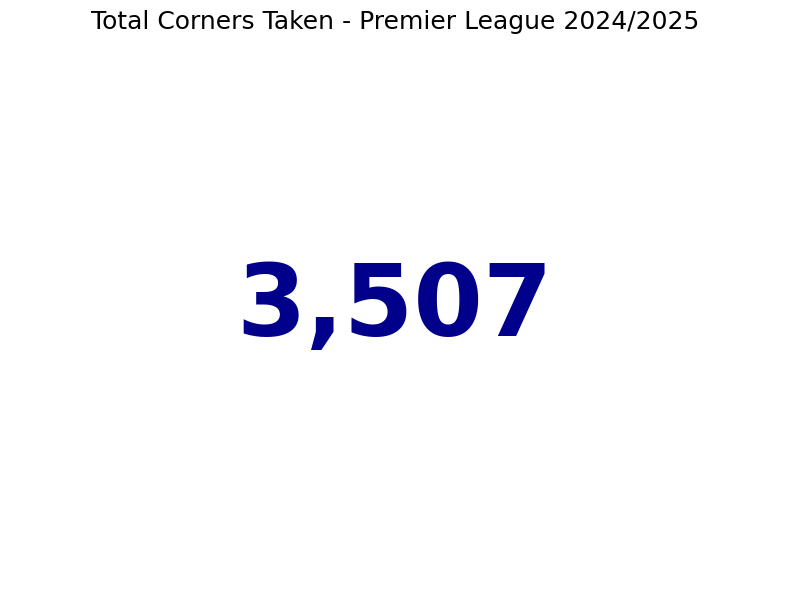

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv('complete_corner_stats.csv')

# Clean and sum the corners
df['Corners Taken'] = pd.to_numeric(df['Corners Taken'], errors='coerce')
total_corners = df['Corners Taken'].sum()

# Create big number chart
plt.figure(figsize=(8, 6))
plt.text(0.5, 0.5, f"{total_corners:,}", fontsize=72, ha='center', va='center', weight='bold', color='darkblue')
plt.title("Total Corners Taken - Premier League 2024/2025", fontsize=18)
plt.axis('off')
plt.tight_layout()
plt.show()
